In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import copy
import os
import random
import math as math
import matplotlib.pylab as plt #Typically matplotlib.pylab is imported as plt (shortened name)
import pdb
from scipy.optimize import minimize
import shutil
import csv
from MyLatexFunctions_SocialLearning import * 
from itertools import permutations 
from itertools import combinations
import csv


import networkx as nx

# This file is used to compute the QRE in network (b). 
## Note： this is the later version, where payoff and prob are both matrices

In [2]:
outputfolder = "C:\\Users\\xinxi\\Anaconda3\\Xinxin's Files\\Networks\\4O3I_Distance\\"

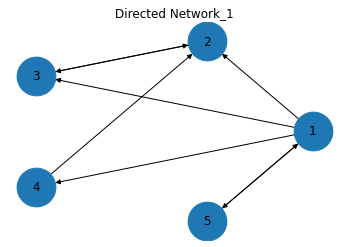

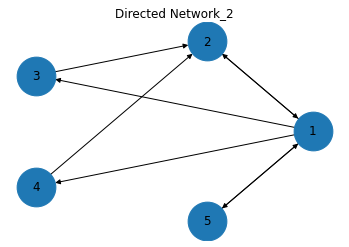

In [3]:
network = ["c1","c2"]
Alldata =  pd.DataFrame()
for i in range(1,3):
    data = pd.read_csv(outputfolder+"network_c"+str(i)+".csv", sep=",", header=0)
    #data.columns = [ "from", "to" ]
    data["network"] = i
    Alldata = Alldata.append(data)

    
for i in range(1,3):
    # Build your graph. Note that we use the DiGraph function to create the graph!
    G=nx.from_pandas_edgelist(Alldata[Alldata.network==i], 'from', 'to', create_using=nx.DiGraph() )

    # Make the graph
    f1 = plt.figure()
    plt.title("Directed Network_"+str(i))
    nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=1500, alpha=1, arrows=True) 
    plt.show()

# Part 1: Preliminaries

In [4]:
# CRRA utility function
def CRRA(x,gamma): #can use offset by xMin in case of negative values of x
    if gamma == 1:
        return np.log(x)
    else:
        return ((x)**(1-gamma) - 1)/(1-gamma)

## Part 2: Compute QRE at turn 0

In [6]:
# Define the payoff, assuming that the utility depends solely on the payoff
# Estimate the prob of decising at turn 0,1,2,3,4, (5 is ignored because it should be 1-sum(previous 4))
# pOther = matrix （5*5）
#[A: decide at turn 0,1,2,3,4
# B: ...
# C: ... 
# D: ...
# E: ...]
# pOther is an array!
# pOther[0,1] A decide at turn 0 p[0], decide at turn 1 p[1]
# B decide at turn 0 p[5]

# Calculate expected utility of action a given other players' mixing prob. (Turocy,for network)

def payoff(pOther, cost):
    '''This is for network (a)'''
    diff_pay = 100
    q = 0.7
    if cost=='h':
        c = 8
    elif cost == 'l':
        c = 1
    # We know there are 5 nodes, pay matrix is 5X6 ( 6 period)
    pay =  np.empty((5,6),dtype=float)
    pay[:,0] = ProbCorrect_Bayesian(1,q)*diff_pay
    
    # Note: since here the payoff is about turn 0,1,2, need to do the max in the 
    # indegree = 2, node A
    pay_1 = ProbCorrect_Bayesian(3,q)*diff_pay - c
    pay_2 = pOther[5]*ProbCorrect_Bayesian(3,q)*diff_pay + pOther[6]*ProbCorrect_Bayesian(5,q)*diff_pay + (1- pOther[5] - pOther[6])*ProbCorrect_Bayesian(5,q)*diff_pay - 2*c
    pay[0,1] = pay_1
    pay[0,2] = pay_2
    j = 2
    i = 1
    while j < 5:        
        j = j+ 1
        pay[0,j] = pay_2 - i*c
        i += 1
    
    # indegree = 3, node B
    pay_1 = ProbCorrect_Bayesian(4,q)*diff_pay - c
    pay_2 = pOther[0]*ProbCorrect_Bayesian(4,q)*diff_pay + (1- pOther[0])*ProbCorrect_Bayesian(5,q)*diff_pay - 2*c
    pay[1,1] = pay_1
    pay[1,2] = pay_2
    j = 2
    i = 1
    while j < 5:        
        j = j+ 1
        pay[1,j] = pay_2 - i*c
        i += 1
    
    
    # indegree = 1, node C or D, (position 2,3)
    pay_1 = ProbCorrect_Bayesian(2,q)*diff_pay - c
    pay_2 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (1-pOther[0])*ProbCorrect_Bayesian(4,q)*diff_pay - 2*c
    pay_3 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (pOther[1] + (1-pOther[0]-pOther[1])*pOther[5])*ProbCorrect_Bayesian(4,q)*diff_pay +(1-pOther[0]-pOther[1])*(1-pOther[5])*ProbCorrect_Bayesian(5,q)*diff_pay - 3*c
       
    pay[2,1] = pay_1
    pay[3,1] = pay_1
    pay[2,2] = pay_2
    pay[3,2] = pay_2
    pay[2,3] = pay_3
    pay[3,3] = pay_3
    j = 3
    i = 1
    while j < 5:        
        j = j+ 1
        pay[2,j] = pay_3 - i*c
        pay[3,j] = pay_3 - i*c
        i += 1
    
    
    # indegree = 1, node E, (position 4)
    pay_2 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (1- pOther[0])*ProbCorrect_Bayesian(3,q)*diff_pay - 2*c
    pay_3 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (pOther[1] + (1-pOther[0]-pOther[1])*pOther[5])*ProbCorrect_Bayesian(3,q)*diff_pay + (1-pOther[0]-pOther[1])*(1-pOther[5])*ProbCorrect_Bayesian(5,q)*diff_pay - 3*c

    pay[4,1] = pay_1
    pay[4,2] = pay_2
    pay[4,3] = pay_3
    j = 3
    i = 1
    while j < 5:        
        j = j+ 1
        pay[4,j] = pay_3 - i*c
        
        i += 1

    return pay
    
    


In [ ]:
ProbCorrect_Bayesian(4,0.7)*100 - 8

In [ ]:
pp = [0,0,0.3,0.01,0.01,0,0.3,0.3,0.01,0.01,0.3,0.3,0.3,0.01,0.01,0.3,0.3,0.3,0.01,0.01,0.3,0.3,0.3,0.01,0.01]
payoff(pp,cost)

In [ ]:
pp = [0,0,0.3,0.01,0.01,1,0.3,0.3,0.01,0.01,0.3,0.3,0.3,0.01,0.01,0.3,0.3,0.3,0.01,0.01,0.3,0.3,0.3,0.01,0.01]
payoff(pp,cost)

Assumptions:
    * Five agents
    * Five nodes, the prob of deciding at turn each turn 0 - 4


### Method 1: for all 5 turns, find the QRE (not converting!!)

In [ ]:

#Define the function whose 0 we want to find  (Turocy)
def F(p, l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0

    p_real = np.exp(p)
    p = np.reshape(p, (5,5))
   
    p_5 = np.log(1- np.exp(p).sum(axis=1))
    
  

    H =  np.empty((5,15),dtype=float)

    # This version: the probability is the difference between prob of deciding at turn 0 vs the exact payoff of a future turn
    
    H[:,0]= p[:,0] - p[:,1] - l*(payoff(p_real, cost)[:,0]- payoff(p_real, cost)[:,1])
    H[:,1]= p[:,0] - p[:,2] - l*(payoff(p_real, cost)[:,0]- payoff(p_real, cost)[:,2])
    H[:,2]= p[:,0] - p[:,3] - l*(payoff(p_real, cost)[:,0]- payoff(p_real, cost)[:,3])
    H[:,3]= p[:,0] - p[:,4] - l*(payoff(p_real, cost)[:,0]- payoff(p_real, cost)[:,4]) 
    H[:,10]= p[:,0] - p_5 - l*(payoff(p_real, cost)[:,0]- payoff(p_real, cost)[:,5])
    
    H[:,4]= p[:,1] - p[:,2] - l*(payoff(p_real, cost)[:,1]- payoff(p_real, cost)[:,2])
    H[:,5]= p[:,1] - p[:,3] - l*(payoff(p_real, cost)[:,1]- payoff(p_real, cost)[:,3])
    H[:,6]= p[:,1] - p[:,4] - l*(payoff(p_real, cost)[:,1]- payoff(p_real, cost)[:,4])
    H[:,11]= p[:,1] - p_5 - l*(payoff(p_real, cost)[:,1]- payoff(p_real, cost)[:,5])
    
    H[:,7]= p[:,2] - p[:,3] - l*(payoff(p_real, cost)[:,2]- payoff(p_real, cost)[:,3])
    H[:,8]= p[:,2] - p[:,4] - l*(payoff(p_real, cost)[:,2]- payoff(p_real, cost)[:,4])
    H[:,12]= p[:,2] - p_5 - l*(payoff(p_real, cost)[:,2]- payoff(p_real, cost)[:,5])
    
    H[:,9]= p[:,3] - p[:,4] - l*(payoff(p_real, cost)[:,3]- payoff(p_real, cost)[:,4])
    H[:,13]= p[:,3] - p_5 - l*(payoff(p_real, cost)[:,3]- payoff(p_real, cost)[:,5])
    H[:,14]= p[:,4] - p_5 - l*(payoff(p_real, cost)[:,4]- payoff(p_real, cost)[:,5])
    H = H.reshape(-1)
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'ineq', 'fun' : lambda p: 1- np.sum(np.exp(p)[0:5]-0.00000001) } ,
   {'type': 'ineq', 'fun' : lambda p: 1-np.sum(np.exp(p)[5:10]-0.00000001)  },
    {'type': 'ineq', 'fun' : lambda p: 1- np.sum(np.exp(p)[10:15]-0.00000001) },
    {'type': 'ineq', 'fun' : lambda p: 1- np.sum(np.exp(p)[15:20]-0.00000001) },
    {'type': 'ineq', 'fun' : lambda p: 1- np.sum(np.exp(p)[20:25]-0.00000001) },
   )



cost='l'
lSeq = np.arange(0,10,.25)
QRE = np.zeros((len(lSeq),25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])


for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] =  np.exp(res.x)
    
#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,0],lSeq, QRE[:,1],lSeq, QRE[:,2],lSeq, QRE[:,3],lSeq, QRE[:,4])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node A for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,5],lSeq, QRE[:,6],lSeq, QRE[:,7],lSeq, QRE[:,8],lSeq, QRE[:,9])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node B for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,10],lSeq, QRE[:,11],lSeq, QRE[:,12],lSeq, QRE[:,13],lSeq, QRE[:,14])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node C for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,15],lSeq, QRE[:,16],lSeq, QRE[:,17],lSeq, QRE[:,18],lSeq, QRE[:,19])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node D for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,20],lSeq, QRE[:,21],lSeq, QRE[:,22],lSeq, QRE[:,23],lSeq, QRE[:,24])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node E for turn")
plt.show()  

In [ ]:
res

In [ ]:
# Prob of deciding at turn 0 for 5 nodes:
[QRE[:,0], QRE[:,5],QRE[:,10],QRE[:,15], QRE[:,20]]

### Method 2: at turn 0, only find the prob of deciding at turn 0, find the QRE (not converting either)

- Here define the QRE as deciding at turn 0 vs deciding at future turns, where the payoff of future turns will be the max of all future turns. 
- Advantage: clear tradeoff, 
- Disadvantage: A optimal to decide at turn 1? also E looks wierd

In [ ]:

#Define the function whose 0 we want to find  (Turocy)
def F(p, l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0

    p_real = np.exp(p)
    p = np.reshape(p, (5,5))
   
    p_5 = np.log(1- np.exp(p).sum(axis=1))

    H =  np.empty((5,15),dtype=float)

    # This version: the probability is the difference between prob of deciding at turn 0 vs later
    
    H[:,0]= p[:,0] - p[:,1] - l*(payoff(p_real, cost)[:,0]- np.max(payoff(p_real, cost)[:,1:] , axis=1))
    H[:,1]= p[:,0] - p[:,2] - l*(payoff(p_real, cost)[:,0]- np.max(payoff(p_real, cost)[:,2:], axis=1))
    H[:,2]= p[:,0] - p[:,3] - l*(payoff(p_real, cost)[:,0]- np.max(payoff(p_real, cost)[:,3:], axis=1))
    H[:,3]= p[:,0] - p[:,4] - l*(payoff(p_real, cost)[:,0]- np.max(payoff(p_real, cost)[:,4:], axis=1))
    H[:,10]= p[:,0] - p_5 - l*(payoff(p_real, cost)[:,0]- payoff(p_real, cost)[:,5])
    
    H[:,4]= p[:,1] - p[:,2] - l*(payoff(p_real, cost)[:,1]- np.max(payoff(p_real, cost)[:,2:], axis=1))
    H[:,5]= p[:,1] - p[:,3] - l*(payoff(p_real, cost)[:,1]- np.max(payoff(p_real, cost)[:,3:], axis=1))
    H[:,6]= p[:,1] - p[:,4] - l*(payoff(p_real, cost)[:,1]- np.max(payoff(p_real, cost)[:,4:], axis=1))
    H[:,11]= p[:,1] - p_5 - l*(payoff(p_real, cost)[:,1]- payoff(p_real, cost)[:,5])
    
    H[:,7]= p[:,2] - p[:,3] - l*(payoff(p_real, cost)[:,2]- np.max(payoff(p_real, cost)[:,3:], axis=1))
    H[:,8]= p[:,2] - p[:,4] - l*(payoff(p_real, cost)[:,2]- np.max(payoff(p_real, cost)[:,4:], axis=1))
    H[:,12]= p[:,2] - p_5 - l*(payoff(p_real, cost)[:,2]- payoff(p_real, cost)[:,5])
    
    H[:,9]= p[:,3] - p[:,4] - l*(payoff(p_real, cost)[:,3]- np.max(payoff(p_real, cost)[:,4:], axis=1))
    H[:,13]= p[:,3] - p_5 - l*(payoff(p_real, cost)[:,3]- payoff(p_real, cost)[:,5])
    H[:,14]= p[:,4] - p_5 - l*(payoff(p_real, cost)[:,4]- payoff(p_real, cost)[:,5])
    H = H.reshape(-1)
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'ineq', 'fun' : lambda p: 1- np.sum(np.exp(p)[0:5]-0.00000001) } ,
   {'type': 'ineq', 'fun' : lambda p: 1-np.sum(np.exp(p)[5:10]-0.00000001)  },
    {'type': 'ineq', 'fun' : lambda p: 1- np.sum(np.exp(p)[10:15]-0.00000001) },
    {'type': 'ineq', 'fun' : lambda p: 1- np.sum(np.exp(p)[15:20]-0.00000001) },
    {'type': 'ineq', 'fun' : lambda p: 1- np.sum(np.exp(p)[20:25]-0.00000001) },
   )






cost='l'
lSeq = np.arange(0,10,.25)
QRE_method2 = np.zeros((len(lSeq),25))
# p0 = np.log([[0.2,0.2,0.2,0.2,0.1], [0.2,0.2,0.2,0.2,0.1],[0.2,0.2,0.2,0.2,0.1],[0.2,0.2,0.2,0.2,0.1],[0.2,0.2,0.2,0.2,0.1]])
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])

for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_method2[i] =  np.exp(res.x)

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_method2[:,0],lSeq, QRE_method2[:,1],lSeq, QRE_method2[:,2],lSeq, QRE_method2[:,3],lSeq, QRE_method2[:,4])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE_method2 when cost="+str(cost)+" Prob of decision at node A for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_method2[:,5],lSeq, QRE_method2[:,6],lSeq, QRE_method2[:,7],lSeq, QRE_method2[:,8],lSeq, QRE_method2[:,9])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE_method2 when cost="+str(cost)+" Prob of decision at node B for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_method2[:,10],lSeq, QRE_method2[:,11],lSeq, QRE_method2[:,12],lSeq, QRE_method2[:,13],lSeq, QRE_method2[:,14])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE_method2 when cost="+str(cost)+" Prob of decision at node C for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_method2[:,15],lSeq, QRE_method2[:,16],lSeq, QRE_method2[:,17],lSeq, QRE_method2[:,18],lSeq, QRE_method2[:,19])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE_method2 when cost="+str(cost)+" Prob of decision at node D for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_method2[:,20],lSeq, QRE_method2[:,21],lSeq, QRE_method2[:,22],lSeq, QRE_method2[:,23],lSeq, QRE_method2[:,24])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','2', '3','4'], loc = 0)
ax.set_title("QRE_method2 when cost="+str(cost)+" Prob of decision at node E for turn")
plt.show()  

### Method 3 (on top of method 2) : at turn 0, only find the prob of deciding at turn 0 vs not 

### next, futher improve by estimating each node with the prob of deciding at turn 0, 1 vs future (see whether the results are different)

In [ ]:

#Define the function whose 0 we want to find  (Turocy)
def F(p, l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0

    p_real = np.exp(p)

    # node A
    H1 = p[0] - p[1] -  l*(payoff(p_real, cost)[0,0]- np.max(payoff(p_real, cost)[0,1:] ))
    H2 = p[0] - np.log(1- p_real[0] - p_real[1]) -  l*(payoff(p_real, cost)[0,0]- np.max(payoff(p_real, cost)[0,2:]))
    H3 = p[1] - np.log(1- p_real[0] - p_real[1]) -  l*(payoff(p_real, cost)[0,1]- np.max(payoff(p_real, cost)[0,2:]))
    # node B
    H4 = p[5] - np.log(1-p_real[5]) - l*(payoff(p_real, cost)[1,0]- np.max(payoff(p_real, cost)[1,1:] ))
#     # node C
#     H5 = p[10] - (1-p_real[10]) - l*(payoff(p_real, cost)[2,0]- np.max(payoff(p_real, cost)[2,1:] ))
#     # node D
#     H6 = p[15] - (1-p_real[15]) - l*(payoff(p_real, cost)[3,0]- np.max(payoff(p_real, cost)[3,1:] ))
#     # node E
#     H5 = p[20] - (1-p_real[20]) - l*(payoff(p_real, cost)[4,0]- np.max(payoff(p_real, cost)[4,1:] ))
    
    H = np.array([H1, H2, H3, H4])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[0])-np.exp(p[1]) } ,
           {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[5])  },
            {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[10])  },
    {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[15])  },
    {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[20])  },
   
   )




In [ ]:
cost='h'
lSeq = np.arange(0,10,.25)
QRE = np.zeros((len(lSeq),25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] =  np.exp(res.x)
    A_turn0 = QRE[i, 0]
    B_turn0 = QRE[i, 5]
    C_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[2,0]- np.max(payoff(QRE[i], cost)[2,1:]))
    D_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[3,0]- np.max(payoff(QRE[i], cost)[3,1:]))
    E_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[4,0]- np.max(payoff(QRE[i], cost)[4,1:]))
    QRE_turn0[i] = [A_turn0, B_turn0, C_turn0, D_turn0, E_turn0]
    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,0],lSeq, QRE[:,1],lSeq, 1- QRE[:,0]-QRE[:,1])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node A for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,5],lSeq, 1- QRE[:,5])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','>= 1'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node B for turn")
plt.show()    



In [ ]:
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
res = minimize(F, p0, args=(10000,cost,), method='SLSQP',constraints=cons)
QRE[i] =  np.exp(res.x)
A_turn0 = QRE[i, 0]
B_turn0 = QRE[i, 5]
C_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[2,0]- np.max(payoff(QRE[i], cost)[2,1:]))
D_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[3,0]- np.max(payoff(QRE[i], cost)[3,1:]))
E_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[4,0]- np.max(payoff(QRE[i], cost)[4,1:]))
QRE_turn0 = [A_turn0, B_turn0, C_turn0, D_turn0, E_turn0]

### Method 4: based on method 3

In [ ]:

#Define the function whose 0 we want to find  (Turocy)
def F(p, l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0

    p_real = np.exp(p)

    # node A
    H1 = p[0] - p[1] -  l*(payoff(p_real, cost)[0,0]- payoff(p_real, cost)[0,1] )
    H2 = p[0] - np.log(1- p_real[0] - p_real[1]) -  l*(payoff(p_real, cost)[0,0]- np.max(payoff(p_real, cost)[0,2:]))
    H3 = p[1] - np.log(1- p_real[0] - p_real[1]) -  l*(payoff(p_real, cost)[0,1]- np.max(payoff(p_real, cost)[0,2:]))
    # node B
    H4 = p[5] - p[6] - l*(payoff(p_real, cost)[1,0]- payoff(p_real, cost)[1,1] )
    H41 = p[5] - np.log(1-p_real[5] - p_real[6]) - l*(payoff(p_real, cost)[1,0]- np.max(payoff(p_real, cost)[1,2:] ))
    H42 = p[6] - np.log(1-p_real[5] - p_real[6]) - l*(payoff(p_real, cost)[1,1]- np.max(payoff(p_real, cost)[1,2:] ))
    # node C
    H5 = p[10] - p[11] - l*(payoff(p_real, cost)[2,0]- payoff(p_real, cost)[2,1] )
    H51 = p[10] - np.log(1-p_real[10]-p_real[11]) - l*(payoff(p_real, cost)[2,0]- np.max(payoff(p_real, cost)[2,2:] ))
    H52 = p[11] - np.log(1-p_real[10]-p_real[11]) - l*(payoff(p_real, cost)[2,1]- np.max(payoff(p_real, cost)[2,2:] ))
    # node D
    H6 = p[15] - p[16] - l*(payoff(p_real, cost)[3,0]-payoff(p_real, cost)[3,1] )
    H61 =  p[15] - np.log(1-p_real[15]-p_real[16]) - l*(payoff(p_real, cost)[3,0]- np.max(payoff(p_real, cost)[3,2:] ))
    H62 =  p[16] - np.log(1-p_real[15]-p_real[16]) - l*(payoff(p_real, cost)[3,1]- np.max(payoff(p_real, cost)[3,2:] ))
    # node E
    H7 = p[20] - p[21]  - l*(payoff(p_real, cost)[4,0]- payoff(p_real, cost)[4,1] )
    H71 = p[20] - np.log(1-p_real[20]-p_real[21]) - l*(payoff(p_real, cost)[4,0]- np.max(payoff(p_real, cost)[4,2:] ))
    H72 = p[21] - np.log(1-p_real[20]-p_real[21]) - l*(payoff(p_real, cost)[4,1]- np.max(payoff(p_real, cost)[4,2:] ))
    
    H = np.array([H1, H2, H3, H4, H41, H42, H5, H51, H52, H6, H61, H62, H7, H71, H72])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[0])-np.exp(p[1]) -1e-30  } ,
           {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[5]) - np.exp(p[6]) - 1e-30},
            {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[10]) -np.exp(p[11]) -1e-30 },
    {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[15]) -np.exp(p[16]) -1e-30 },
    {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[20]) -  np.exp(p[21]) -1e-30 },
   
   )




In [7]:
## Try something new, use the second position to denote 1-p[1]-p[2]
## This is the eq at turn 0
#Define the function whose 0 we want to find  (Turocy)
def F(p, l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0

    p_real = np.exp(p)

    # node A
    H1 = p[0] - p[1] -  l*(payoff(p_real, cost)[0,0]- payoff(p_real, cost)[0,1] )
    H2 = p[0] - p[2] -  l*(payoff(p_real, cost)[0,0]- np.max(payoff(p_real, cost)[0,2:]))
    H3 = p[1] - p[2] -  l*(payoff(p_real, cost)[0,1]- np.max(payoff(p_real, cost)[0,2:]))
    # node B
    H4 = p[5] - p[6] - l*(payoff(p_real, cost)[1,0]- payoff(p_real, cost)[1,1] )
    H41 = p[5] - p[7] - l*(payoff(p_real, cost)[1,0]- np.max(payoff(p_real, cost)[1,2:] ))
    H42 = p[6] - p[7] - l*(payoff(p_real, cost)[1,1]- np.max(payoff(p_real, cost)[1,2:] ))
    # node C
    H5 = p[10] - p[11] - l*(payoff(p_real, cost)[2,0]- payoff(p_real, cost)[2,1] )
    H51 = p[10] -p[12] - l*(payoff(p_real, cost)[2,0]- np.max(payoff(p_real, cost)[2,2:] ))
    H52 = p[11] - p[12] - l*(payoff(p_real, cost)[2,1]- np.max(payoff(p_real, cost)[2,2:] ))
    # node D
    H6 = p[15] - p[16] - l*(payoff(p_real, cost)[3,0]-payoff(p_real, cost)[3,1] )
    H61 =  p[15] - p[17] - l*(payoff(p_real, cost)[3,0]- np.max(payoff(p_real, cost)[3,2:] ))
    H62 =  p[16] - p[17] - l*(payoff(p_real, cost)[3,1]- np.max(payoff(p_real, cost)[3,2:] ))
    # node E
    H7 = p[20] - p[21]  - l*(payoff(p_real, cost)[4,0]- payoff(p_real, cost)[4,1] )
    H71 = p[20] - p[22] - l*(payoff(p_real, cost)[4,0]- np.max(payoff(p_real, cost)[4,2:] ))
    H72 = p[21] - p[22] - l*(payoff(p_real, cost)[4,1]- np.max(payoff(p_real, cost)[4,2:] ))
    
    H = np.array([H1, H2, H3, H4, H41, H42, H5, H51, H52, H6, H61, H62, H7, H71, H72])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'eq', 'fun' : lambda p: 1- np.exp(p[0])-np.exp(p[1]) -np.exp(p[2])  } ,
           {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[5]) - np.exp(p[6])  -np.exp(p[7])},
            {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[10]) -np.exp(p[11])  -np.exp(p[12]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[15]) -np.exp(p[16]) -np.exp(p[17]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[20]) -  np.exp(p[21]) -np.exp(p[22]) },
   
   )




In [10]:
datafolder = "C:\\Users\\xinxi\\Purdue\\EffectiveSocialLearningProject\\DataAnalysis\\ImportedData\\"


<ipython-input-11-d4fbf4df2ad3>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)


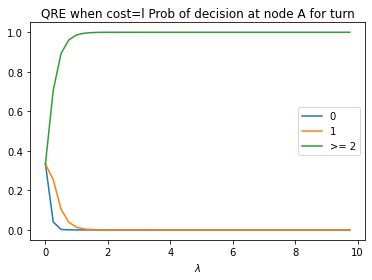

<ipython-input-11-d4fbf4df2ad3>:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>=  2'], loc = 0)


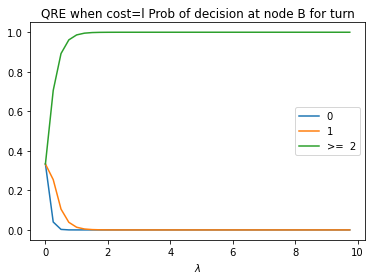

<ipython-input-11-d4fbf4df2ad3>:42: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)


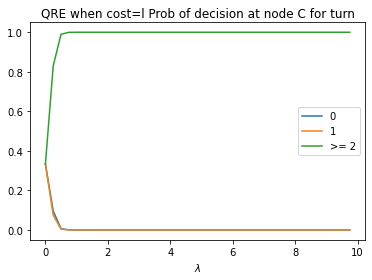

<ipython-input-11-d4fbf4df2ad3>:51: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)


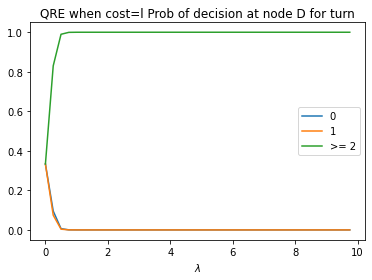

<ipython-input-11-d4fbf4df2ad3>:60: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)


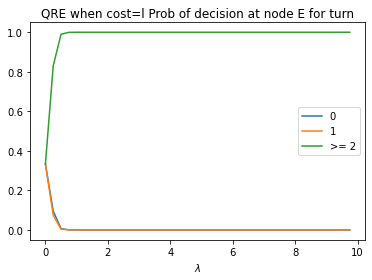

<ipython-input-11-d4fbf4df2ad3>:69: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['A','B', 'C','D','E'], loc = 0)


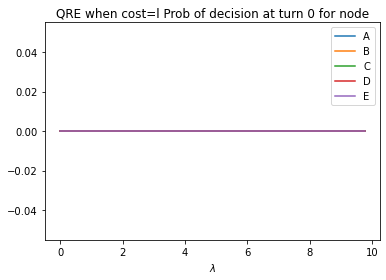

In [11]:
cost='l'
lSeq = np.arange(0,10,.25)
QRE = np.zeros((len(lSeq),25))
QRE_turn0 = np.zeros((len(lSeq), 5))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] =  np.exp(res.x)
#     A_turn0 = QRE[i, 0]
#     B_turn0 = QRE[i, 5]
#     C_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[2,0]- np.max(payoff(QRE[i], cost)[2,1:]))
#     D_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[3,0]- np.max(payoff(QRE[i], cost)[3,1:]))
#     E_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[4,0]- np.max(payoff(QRE[i], cost)[4,1:]))
#     QRE_turn0[i] = [A_turn0, B_turn0, C_turn0, D_turn0, E_turn0]
QRE_l = QRE
np.savetxt(datafolder+'QRE_bL.csv', QRE_l, delimiter=',')

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,0],lSeq, QRE[:,1],lSeq, QRE[:,2])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node A for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,5],lSeq, QRE[:,6],lSeq, QRE[:,7])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>=  2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node B for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,10],lSeq, QRE[:,11],lSeq, QRE[:,12])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node C for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,15],lSeq, QRE[:,16],lSeq, QRE[:,17])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node D for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,20],lSeq, QRE[:,21],lSeq, QRE[:,22])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node E for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_turn0[:,0] ,lSeq, QRE_turn0[:,1], lSeq, QRE_turn0[:,2], lSeq, QRE_turn0[:,3], lSeq, QRE_turn0[:,4] )
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['A','B', 'C','D','E'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at turn 0 for node")
plt.show()  

In [12]:
res

     fun: 9.900545666552578e-14
     jac: array([ 4.22989558e-07, -5.78590885e-07,  1.25799005e-07, -0.00000000e+00,
       -0.00000000e+00, -2.29526677e-07,  1.06119188e-07,  9.36051663e-08,
       -0.00000000e+00, -0.00000000e+00,  3.96472331e-08,  2.53233480e-07,
       -3.22683036e-07, -0.00000000e+00, -0.00000000e+00,  3.39714262e-07,
       -7.89802357e-08, -3.50140994e-07, -0.00000000e+00, -0.00000000e+00,
        7.75998217e-08,  1.83110899e-07, -3.50117688e-07, -0.00000000e+00,
       -0.00000000e+00])
 message: 'Optimization terminated successfully'
    nfev: 80
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([-1.13997000e+02, -4.18470001e+01,  5.38162376e-14, -1.60943791e+00,
       -2.30258509e+00, -1.13997000e+02, -4.18470000e+01,  6.99738861e-14,
       -1.60943791e+00, -2.30258509e+00, -1.04247000e+02, -1.13997000e+02,
        6.34149720e-17, -1.60943791e+00, -2.30258509e+00, -1.04247000e+02,
       -1.13997000e+02, -4.29023602e-17, -1.60943791e+00, -2

<ipython-input-13-452f1d9d959c>:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)


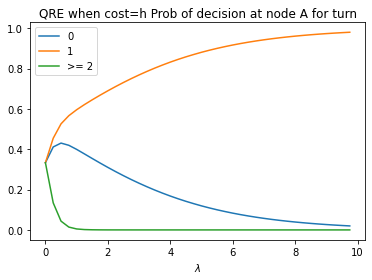

<ipython-input-13-452f1d9d959c>:35: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>=  2'], loc = 0)


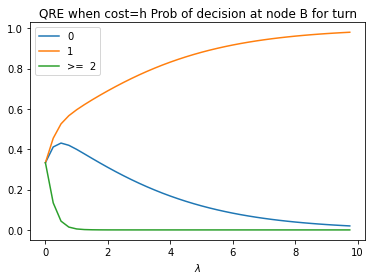

<ipython-input-13-452f1d9d959c>:44: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)


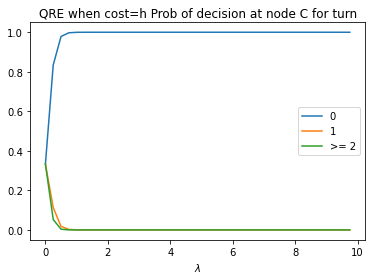

<ipython-input-13-452f1d9d959c>:53: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)


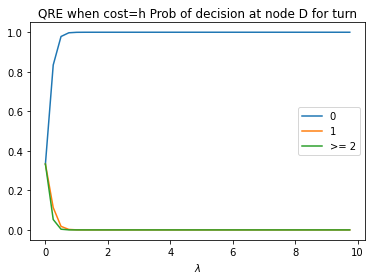

<ipython-input-13-452f1d9d959c>:62: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)


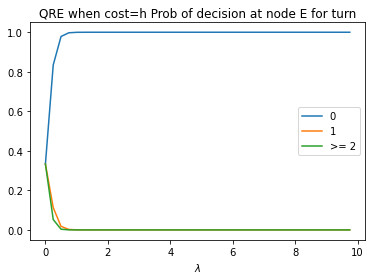

<ipython-input-13-452f1d9d959c>:71: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['A','B', 'C','D','E'], loc = 0)


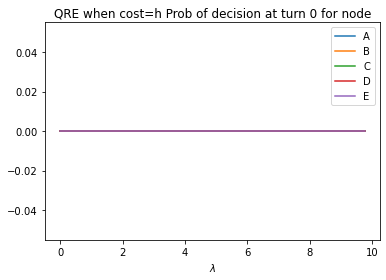

In [13]:
# The prob for this part is that 1- p[5] - p[6] goes too closely to 0 and cause the np.log not working properly 


cost='h'
lSeq = np.arange(0,10,.25)
QRE = np.zeros((len(lSeq),25))
QRE_turn0 = np.zeros((len(lSeq), 5))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] =  np.exp(res.x)
#     A_turn0 = QRE[i, 0]
#     B_turn0 = QRE[i, 5]
#     C_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[2,0]- np.max(payoff(QRE[i], cost)[2,1:]))
#     D_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[3,0]- np.max(payoff(QRE[i], cost)[3,1:]))
#     E_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[4,0]- np.max(payoff(QRE[i], cost)[4,1:]))
#     QRE_turn0[i] = [A_turn0, B_turn0, C_turn0, D_turn0, E_turn0]


#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,0],lSeq, QRE[:,1],lSeq, QRE[:,2])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node A for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,5],lSeq, QRE[:,6],lSeq, QRE[:,7])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>=  2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node B for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,10],lSeq, QRE[:,11],lSeq, QRE[:,12])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node C for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,15],lSeq, QRE[:,16],lSeq, QRE[:,17])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node D for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE[:,20],lSeq, QRE[:,21],lSeq, QRE[:,22])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['0','1','>= 2'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node E for turn")
plt.show()    

#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_turn0[:,0] ,lSeq, QRE_turn0[:,1], lSeq, QRE_turn0[:,2], lSeq, QRE_turn0[:,3], lSeq, QRE_turn0[:,4] )
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['A','B', 'C','D','E'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at turn 0 for node")
plt.show()  

In [ ]:
# For estimation , a more fine l grid:
cost='h'
lSeq = np.arange(0,10,.01)
QRE = np.zeros((len(lSeq),25))
QRE_turn0 = np.zeros((len(lSeq), 5))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] =  np.exp(res.x)
#     QRE_turn0[i] = [QRE[i][0], QRE[i][5],QRE[i][10],QRE[i][15],QRE[i][20]]
#     QRE_NOTturn0[i] = [QRE[i][1]+QRE[i][2], QRE[i][6]+QRE[i][7],QRE[i][11]+QRE[i][12],QRE[i][16]+QRE[i][17],QRE[i][21]+QRE[i][22]]
QRE_h = QRE
np.savetxt(datafolder+'QRE_bH.csv', QRE_h, delimiter=',')

In [32]:
data = pd.read_csv(datafolder+"Networkb_CostH"+".csv", sep=",")
Decide_0 = data.iloc[:,3:].to_numpy()==0 * 1
Decide_1 = data.iloc[:,3:].to_numpy()==1 * 1


In [33]:
data

,session,g_id,round_id,A_period,B_period,C_period,D_period,E_period
0,6,1,1,1,1,0,2,2
1,6,1,2,1,1,0,3,2
2,6,1,3,1,1,0,2,2
3,6,1,4,0,1,2,1,2
4,6,1,5,0,0,0,1,1
...,...,...,...,...,...,...,...,...
115,7,2,26,2,1,3,1,2
116,7,2,27,2,1,3,2,2
117,7,2,28,1,1,2,0,1
118,7,2,29,1,2,2,1,1


In [28]:
QRE_h = QRE

likeli_turn0 = np.zeros(len(QRE_h))

for i in range(len(QRE_h)) :
    l = np.array([QRE_h[i][0], QRE_h[i][5],QRE_h[i][10],QRE_h[i][15],QRE_h[i][20]])
    l_no = np.array([QRE_h[i][1]+QRE_h[i][2], QRE_h[i][6]+QRE_h[i][7],QRE_h[i][11]+QRE_h[i][12],QRE_h[i][16]+QRE_h[i][17],QRE_h[i][21]+QRE_h[i][22]]
)
    l_1 = np.array([QRE_h[i][1], QRE_h[i][6],QRE_h[i][11],QRE_h[i][16],QRE_h[i][21]]
)
    likeli_turn0[i] = np.sum(np.dot(Decide_0,np.log(l))) + np.sum(np.dot(Decide_1, np.log(l_1)))
#     likeli_turn0[i] = np.sum(np.dot(Decide_0,np.log(l))) + np.sum(np.dot(1- Decide_0,np.log(l_no))) 
    
# np.savetxt(datafolder+'likeli_turn0_bH.csv', likeli_turn0, delimiter=',')    

# Note: network b, cost H, with the second expression, linear relationship
# Maybe only use the decision, not the wait 

In [30]:
lSeq[likeli_turn0.argmax()]

0.25

In [ ]:
#Try a different range 
cost='h'
lSeq = np.arange(0,50,.5)
QRE = np.zeros((len(lSeq),25))
QRE_turn0 = np.zeros((len(lSeq), 5))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] =  np.exp(res.x)
#     QRE_turn0[i] = [QRE[i][0], QRE[i][5],QRE[i][10],QRE[i][15],QRE[i][20]]
#     QRE_NOTturn0[i] = [QRE[i][1]+QRE[i][2], QRE[i][6]+QRE[i][7],QRE[i][11]+QRE[i][12],QRE[i][16]+QRE[i][17],QRE[i][21]+QRE[i][22]]
QRE_h = QRE




likeli_turn0 = np.zeros(len(QRE_h))

for i in range(len(QRE_h)) :
    l = np.array([QRE_h[i][0], QRE_h[i][5],QRE_h[i][10],QRE_h[i][15],QRE_h[i][20]])
    l_no = np.array([QRE_h[i][1]+QRE_h[i][2], QRE_h[i][6]+QRE_h[i][7],QRE_h[i][11]+QRE_h[i][12],QRE_h[i][16]+QRE_h[i][17],QRE_h[i][21]+QRE_h[i][22]]
)
#     likeli_turn0[i] = np.sum(np.dot(Decide_0,np.log(l)))
    likeli_turn0[i] = np.sum(np.dot(Decide_0,np.log(l))) + np.sum(np.dot(1- Decide_0,np.log(l_no))) 
    

In [ ]:
likeli_turn0.argmax()

# Part 3: For turn 1, 

Firstly redefine the payoff, as payoff is determined by subjects' behaviors at turn 0, 

In [37]:
## Try something new, use the second position to denote 1-p[1]-p[2]
## This is the eq at turn 1
## can update the prob matrix in function F
#Define the function whose 0 we want to find  (Turocy)
def F_A0B0(p,  l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0
    
    p_real = np.exp(p)
    p_real[0]=p_real[5]=1
    p_real[1:4]=0
    p_real[6:9]=0
    
    # node C
    H5 = p[11] - p[12] - l*(payoff(p_real, cost)[2,1]- payoff(p_real, cost)[2,2] )
    H51 = p[11] -p[13] - l*(payoff(p_real, cost)[2,1]- np.max(payoff(p_real, cost)[2,3:] ))
    H52 = p[12] - p[13] - l*(payoff(p_real, cost)[2,2]- np.max(payoff(p_real, cost)[2,3:] ))
    # node D
    H6 = p[16] - p[17] - l*(payoff(p_real, cost)[3,1]-payoff(p_real, cost)[3,2] )
    H61 =  p[16] - p[18] - l*(payoff(p_real, cost)[3,1]- np.max(payoff(p_real, cost)[3,3:] ))
    H62 =  p[17] - p[18] - l*(payoff(p_real, cost)[3,2]- np.max(payoff(p_real, cost)[3,3:] ))
    # node E
    H7 = p[21] - p[22]  - l*(payoff(p_real, cost)[4,1]- payoff(p_real, cost)[4,2] )
    H71 = p[21] - p[23] - l*(payoff(p_real, cost)[4,1]- np.max(payoff(p_real, cost)[4,3:] ))
    H72 = p[22] - p[23] - l*(payoff(p_real, cost)[4,2]- np.max(payoff(p_real, cost)[4,3:] ))
    
    H = np.array([H5, H51, H52, H6, H61, H62, H7, H71, H72])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = (
            {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[13]) -np.exp(p[11])  -np.exp(p[12]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[18]) -np.exp(p[16]) -np.exp(p[17]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[23]) -  np.exp(p[21]) -np.exp(p[22]) },
   
   )

cost='h'
lSeq = np.arange(0,10,.01)
QRE_turn1_A0B0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_A0B0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_A0B0[i] =  np.exp(res.x)
np.savetxt(datafolder+'QRE_turn1_A0B0_bH.csv', QRE_turn1_A0B0, delimiter=',')

cost='l'
lSeq = np.arange(0,10,.01)
QRE_turn1_A0B0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_A0B0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_A0B0[i] =  np.exp(res.x)
np.savetxt(datafolder+'QRE_turn1_A0B0_bL.csv', QRE_turn1_A0B0, delimiter=',')

In [62]:
def F_A0B0(p,  l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0
    
    p_real = np.exp(p)
    p_real[0]=p_real[5]=1
    p_real[1:4]=0
    p_real[6:9]=0
    
    # node C
    H5 = p[11] - p[12] - l*(payoff(p_real, cost)[2,1]- payoff(p_real, cost)[2,2] )
    H51 = p[11] -p[13] - l*(payoff(p_real, cost)[2,1]- np.max(payoff(p_real, cost)[2,3:] ))
    H52 = p[12] - p[13] - l*(payoff(p_real, cost)[2,2]- np.max(payoff(p_real, cost)[2,3:] ))
    # node D
    H6 = p[16] - p[17] - l*(payoff(p_real, cost)[3,1]-payoff(p_real, cost)[3,2] )
    H61 =  p[16] - p[18] - l*(payoff(p_real, cost)[3,1]- np.max(payoff(p_real, cost)[3,3:] ))
    H62 =  p[17] - p[18] - l*(payoff(p_real, cost)[3,2]- np.max(payoff(p_real, cost)[3,3:] ))
    # node E
    H7 = p[21] - p[22]  - l*(payoff(p_real, cost)[4,1]- payoff(p_real, cost)[4,2] )
    H71 = p[21] - p[23] - l*(payoff(p_real, cost)[4,1]- np.max(payoff(p_real, cost)[4,3:] ))
    H72 = p[22] - p[23] - l*(payoff(p_real, cost)[4,2]- np.max(payoff(p_real, cost)[4,3:] ))
    
    H = np.array([H5, H51, H52, H6, H61, H62, H7, H71, H72])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = (
            {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[13]) -np.exp(p[11])  -np.exp(p[12]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[18]) -np.exp(p[16]) -np.exp(p[17]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[23]) -  np.exp(p[21]) -np.exp(p[22]) },
   
   )



In [69]:
## Try something new, use the second position to denote 1-p[1]-p[2]
## This is the eq at turn 1
## can update the prob matrix in function F
#Define the function whose 0 we want to find  (Turocy)
def F_A0Bnot0(p,  l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0
   
    p_real = np.exp(p)
    p_real[0]=1
    p_real[1:4]=0    
    p_real[5]=0
    # node B
    H4 = p[6] - p[7] - l*(payoff(p_real, cost)[1,1]- payoff(p_real, cost)[1,2] )
    H41 = p[6] - p[8] - l*(payoff(p_real, cost)[1,1]- np.max(payoff(p_real, cost)[1,3:] ))
    H42 = p[7] - p[8] - l*(payoff(p_real, cost)[1,2]- np.max(payoff(p_real, cost)[1,3:] ))
    # node C
    H5 = p[11] - p[12] - l*(payoff(p_real, cost)[2,1]- payoff(p_real, cost)[2,2] )
    H51 = p[11] -p[13] - l*(payoff(p_real, cost)[2,1]- np.max(payoff(p_real, cost)[2,3:] ))
    H52 = p[12] - p[13] - l*(payoff(p_real, cost)[2,2]- np.max(payoff(p_real, cost)[2,3:] ))
    # node D
    H6 = p[16] - p[17] - l*(payoff(p_real, cost)[3,1]-payoff(p_real, cost)[3,2] )
    H61 =  p[16] - p[18] - l*(payoff(p_real, cost)[3,1]- np.max(payoff(p_real, cost)[3,3:] ))
    H62 =  p[17] - p[18] - l*(payoff(p_real, cost)[3,2]- np.max(payoff(p_real, cost)[3,3:] ))
    # node E
    H7 = p[21] - p[22]  - l*(payoff(p_real, cost)[4,1]- payoff(p_real, cost)[4,2] )
    H71 = p[21] - p[23] - l*(payoff(p_real, cost)[4,1]- np.max(payoff(p_real, cost)[4,3:] ))
    H72 = p[22] - p[23] - l*(payoff(p_real, cost)[4,2]- np.max(payoff(p_real, cost)[4,3:] ))
    
    H = np.array([H4, H41, H42, H5, H51, H52, H6, H61, H62, H7, H71, H72])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'eq', 'fun' : lambda p: 1- np.exp(p[8]) - np.exp(p[6])  -np.exp(p[7])},
            {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[13]) -np.exp(p[11])  -np.exp(p[12]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[18]) -np.exp(p[16]) -np.exp(p[17]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[23]) -  np.exp(p[21]) -np.exp(p[22]) },
   
   )

cost='h'
lSeq = np.arange(0,10,.01)
QRE_turn1_A0Bnot0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_A0Bnot0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_A0Bnot0[i] =  np.exp(res.x)
np.savetxt(datafolder+'QRE_turn1_A0Bnot0_bH.csv', QRE_turn1_A0Bnot0, delimiter=',')


cost='l'
lSeq = np.arange(0,10,.01)
QRE_turn1_A0Bnot0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_A0Bnot0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_A0Bnot0[i] =  np.exp(res.x)
np.savetxt(datafolder+'QRE_turn1_A0Bnot0_bL.csv', QRE_turn1_A0Bnot0, delimiter=',')

In [58]:
p_real = np.exp(p0)
p_real[0]=1
p_real[1:4]=0    
p_real[5]=0
payoff(p_real, cost)

array([[70.   , 70.4  , 67.692, 59.692, 51.692, 43.692],
       [70.   , 70.4  , 62.4  , 54.4  , 46.4  , 38.4  ],
       [70.   , 62.   , 54.   , 46.   , 38.   , 30.   ],
       [70.   , 62.   , 54.   , 46.   , 38.   , 30.   ],
       [70.   , 62.   , 54.   , 46.   , 38.   , 30.   ]])

In [68]:
## Try something new, use the second position to denote 1-p[1]-p[2]
## This is the eq at turn 1
## can update the prob matrix in function F
#Define the function whose 0 we want to find  (Turocy)
def F_Anot0Bnot0(p,  l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0
    p_real = np.exp(p)
    p_real[0]=0  
    p_real[5]=0
    
    # node A
    H1 = p[1] - p[2] -  l*(payoff(p_real, cost)[0,1]- payoff(p_real, cost)[0,2] )
    H2 = p[1] - p[3] -  l*(payoff(p_real, cost)[0,1]- np.max(payoff(p_real, cost)[0,3:]))
    H3 = p[2] - p[3] -  l*(payoff(p_real, cost)[0,2]- np.max(payoff(p_real, cost)[0,3:]))
    # node B
    H4 = p[6] - p[7] - l*(payoff(p_real, cost)[1,1]- payoff(p_real, cost)[1,2] )
    H41 = p[6] - p[8] - l*(payoff(p_real, cost)[1,1]- np.max(payoff(p_real, cost)[1,3:] ))
    H42 = p[7] - p[8] - l*(payoff(p_real, cost)[1,2]- np.max(payoff(p_real, cost)[1,3:] ))
    # node C
    H5 = p[11] - p[12] - l*(payoff(p_real, cost)[2,1]- payoff(p_real, cost)[2,2] )
    H51 = p[11] -p[13] - l*(payoff(p_real, cost)[2,1]- np.max(payoff(p_real, cost)[2,3:] ))
    H52 = p[12] - p[13] - l*(payoff(p_real, cost)[2,2]- np.max(payoff(p_real, cost)[2,3:] ))
    # node D
    H6 = p[16] - p[17] - l*(payoff(p_real, cost)[3,1]-payoff(p_real, cost)[3,2] )
    H61 =  p[16] - p[18] - l*(payoff(p_real, cost)[3,1]- np.max(payoff(p_real, cost)[3,3:] ))
    H62 =  p[17] - p[18] - l*(payoff(p_real, cost)[3,2]- np.max(payoff(p_real, cost)[3,3:] ))
    # node E
    H7 = p[21] - p[22]  - l*(payoff(p_real, cost)[4,1]- payoff(p_real, cost)[4,2] )
    H71 = p[21] - p[23] - l*(payoff(p_real, cost)[4,1]- np.max(payoff(p_real, cost)[4,3:] ))
    H72 = p[22] - p[23] - l*(payoff(p_real, cost)[4,2]- np.max(payoff(p_real, cost)[4,3:] ))
    
    H = np.array([H1, H2, H3, H4, H41, H42,H5, H51, H52, H6, H61, H62, H7, H71, H72])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'eq', 'fun' : lambda p: 1- np.exp(p[3])-np.exp(p[1]) -np.exp(p[2])  } ,
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[8]) - np.exp(p[6])  -np.exp(p[7])},
            {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[13]) -np.exp(p[11])  -np.exp(p[12]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[18]) -np.exp(p[16]) -np.exp(p[17]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[23]) -  np.exp(p[21]) -np.exp(p[22]) },
   
   )

cost='h'
lSeq = np.arange(0,10,.01)
QRE_turn1_Anot0Bnot0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_Anot0Bnot0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_Anot0Bnot0[i] =  np.exp(res.x)
np.savetxt(datafolder+'QRE_turn1_Anot0Bnot0_bH.csv', QRE_turn1_Anot0Bnot0, delimiter=',')

cost='l'
lSeq = np.arange(0,10,.01)
QRE_turn1_Anot0Bnot0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_Anot0Bnot0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_Anot0Bnot0[i] =  np.exp(res.x)
np.savetxt(datafolder+'QRE_turn1_Anot0Bnot0_bL.csv', QRE_turn1_Anot0Bnot0, delimiter=',')

In [67]:
## Try something new, use the second position to denote 1-p[1]-p[2]
## This is the eq at turn 1
## can update the prob matrix in function F
#Define the function whose 0 we want to find  (Turocy)
def F_Anot0B0(p,  l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0
    p_real = np.exp(p)
    p_real[0]=0
    p_real[6:9]=0    
    p_real[5]=1
    
    # node A
    H1 = p[1] - p[2] -  l*(payoff(p_real, cost)[0,1]- payoff(p_real, cost)[0,2] )
    H2 = p[1] - p[3] -  l*(payoff(p_real, cost)[0,1]- np.max(payoff(p_real, cost)[0,3:]))
    H3 = p[2] - p[3] -  l*(payoff(p_real, cost)[0,2]- np.max(payoff(p_real, cost)[0,3:]))
    # node C
    H5 = p[11] - p[12] - l*(payoff(p_real, cost)[2,1]- payoff(p_real, cost)[2,2] )
    H51 = p[11] -p[13] - l*(payoff(p_real, cost)[2,1]- np.max(payoff(p_real, cost)[2,3:] ))
    H52 = p[12] - p[13] - l*(payoff(p_real, cost)[2,2]- np.max(payoff(p_real, cost)[2,3:] ))
    # node D
    H6 = p[16] - p[17] - l*(payoff(p_real, cost)[3,1]-payoff(p_real, cost)[3,2] )
    H61 =  p[16] - p[18] - l*(payoff(p_real, cost)[3,1]- np.max(payoff(p_real, cost)[3,3:] ))
    H62 =  p[17] - p[18] - l*(payoff(p_real, cost)[3,2]- np.max(payoff(p_real, cost)[3,3:] ))
    # node E
    H7 = p[21] - p[22]  - l*(payoff(p_real, cost)[4,1]- payoff(p_real, cost)[4,2] )
    H71 = p[21] - p[23] - l*(payoff(p_real, cost)[4,1]- np.max(payoff(p_real, cost)[4,3:] ))
    H72 = p[22] - p[23] - l*(payoff(p_real, cost)[4,2]- np.max(payoff(p_real, cost)[4,3:] ))
    
    H = np.array([H1, H2, H3,H5, H51, H52, H6, H61, H62, H7, H71, H72])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'eq', 'fun' : lambda p: 1- np.exp(p[3])-np.exp(p[1]) -np.exp(p[2])  } ,
            {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[13]) -np.exp(p[11])  -np.exp(p[12]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[18]) -np.exp(p[16]) -np.exp(p[17]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[23]) -  np.exp(p[21]) -np.exp(p[22]) },
   
   )

cost='h'
lSeq = np.arange(0,10,.01)
QRE_turn1_Anot0B0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_Anot0B0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_Anot0B0[i] =  np.exp(res.x)
np.savetxt(datafolder+'QRE_turn1_Anot0B0_bH.csv', QRE_turn1_Anot0B0, delimiter=',')

cost='l'
lSeq = np.arange(0,10,.01)
QRE_turn1_Anot0B0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_Anot0B0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_Anot0B0[i] =  np.exp(res.x)
np.savetxt(datafolder+'QRE_turn1_Anot0B0_bL.csv', QRE_turn1_Anot0B0, delimiter=',')

<ipython-input-39-4f2f953d7264>:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  lgd = ax.legend(handles, labels = ['1','2','>= 3'], loc = 0)


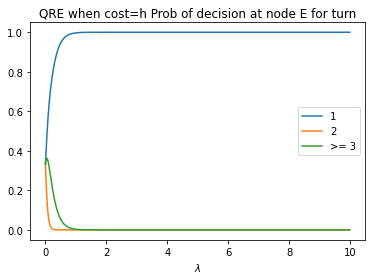

In [39]:
QRE_turn1_A0B0
#Plot
fig, ax = plt.subplots()
ax.plot(lSeq, QRE_turn1_A0B0[:,21],lSeq, QRE_turn1_A0B0[:,22],lSeq, QRE_turn1_A0B0[:,23])
ax.set_xlabel('$\lambda$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels = ['1','2','>= 3'], loc = 0)
ax.set_title("QRE when cost="+str(cost)+" Prob of decision at node E for turn")
plt.show()    

In [ ]:
## Try something new, use the second position to denote 1-p[1]-p[2]
## This is the eq at turn 1
## can update the prob matrix in function F
#Define the function whose 0 we want to find  (Turocy)
def F_A0B0(p,  l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0
    p[0]=p[5]=1
    p[1:4]=0
    p[6:9]=0
    p_real = np.exp(p)
    # node A
    H1 = p[0] - p[1] -  l*(payoff(p_real, cost)[0,0]- payoff(p_real, cost)[0,1] )
    H2 = p[0] - p[2] -  l*(payoff(p_real, cost)[0,0]- np.max(payoff(p_real, cost)[0,2:]))
    H3 = p[1] - p[2] -  l*(payoff(p_real, cost)[0,1]- np.max(payoff(p_real, cost)[0,2:]))
    # node B
    H4 = p[5] - p[6] - l*(payoff(p_real, cost)[1,0]- payoff(p_real, cost)[1,1] )
    H41 = p[5] - p[7] - l*(payoff(p_real, cost)[1,0]- np.max(payoff(p_real, cost)[1,2:] ))
    H42 = p[6] - p[7] - l*(payoff(p_real, cost)[1,1]- np.max(payoff(p_real, cost)[1,2:] ))
    # node C
    H5 = p[10] - p[11] - l*(payoff(p_real, cost)[2,0]- payoff(p_real, cost)[2,1] )
    H51 = p[10] -p[12] - l*(payoff(p_real, cost)[2,0]- np.max(payoff(p_real, cost)[2,2:] ))
    H52 = p[11] - p[12] - l*(payoff(p_real, cost)[2,1]- np.max(payoff(p_real, cost)[2,2:] ))
    # node D
    H6 = p[15] - p[16] - l*(payoff(p_real, cost)[3,0]-payoff(p_real, cost)[3,1] )
    H61 =  p[15] - p[17] - l*(payoff(p_real, cost)[3,0]- np.max(payoff(p_real, cost)[3,2:] ))
    H62 =  p[16] - p[17] - l*(payoff(p_real, cost)[3,1]- np.max(payoff(p_real, cost)[3,2:] ))
    # node E
    H7 = p[20] - p[21]  - l*(payoff(p_real, cost)[4,0]- payoff(p_real, cost)[4,1] )
    H71 = p[20] - p[22] - l*(payoff(p_real, cost)[4,0]- np.max(payoff(p_real, cost)[4,2:] ))
    H72 = p[21] - p[22] - l*(payoff(p_real, cost)[4,1]- np.max(payoff(p_real, cost)[4,2:] ))
    
    H = np.array([H1, H2, H3, H4, H41, H42, H5, H51, H52, H6, H61, H62, H7, H71, H72])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'eq', 'fun' : lambda p: 1- np.exp(p[0])-np.exp(p[1]) -np.exp(p[2])  } ,
           {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[5]) - np.exp(p[6])  -np.exp(p[7])},
            {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[10]) -np.exp(p[11])  -np.exp(p[12]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[15]) -np.exp(p[16]) -np.exp(p[17]) },
    {'type': 'eq', 'fun' : lambda p: 1- np.exp(p[20]) -  np.exp(p[21]) -np.exp(p[22]) },
   
   )

cost='h'
lSeq = np.arange(0,10,.01)
QRE_turn1_A0B0 = np.zeros((len(lSeq), 25))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F_A0B0, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE_turn1_A0B0[i] =  np.exp(res.x)


In [ ]:
def payoff_turn1(A_decide_0, B_decide_0, cost):
    '''This is for network (b)
       group_behavior is a list of A,B,C,D,E 's decision turn for each round
       p_B_1: prob of B deciding at turn 1 '''
    diff_pay = 100
    q = 0.7
    if cost=='h':
        c = 8
    elif cost == 'l':
        c = 1
    
    if group_behavior[1] == 0:
        p_B_1 = 0
    # We know there are 5 nodes, pay matrix is 5X6 ( 6 period)
    pay =  np.empty((5,6),dtype=float)
    pay[:,0] = ProbCorrect_Bayesian(1,q)*diff_pay
    
    # Note: since here the payoff is about turn 0,1,2, need to do the max in the 
    # indegree = 2, node A
    pay_1 = ProbCorrect_Bayesian(3,q)*diff_pay - c
#     pay_2 = pOther[5]*ProbCorrect_Bayesian(3,q)*diff_pay + (1- pOther[5])*ProbCorrect_Bayesian(5,q)*diff_pay - 2*c
    # Depends on B's behavior
    if group_behavior[1] == 0:
        pay_2 = ProbCorrect_Bayesian(3,q)*diff_pay - 2*c
    elif group_behavior[1] > 0:
        pay_2 = ProbCorrect_Bayesian(5,q)*diff_pay - 2*c
        
    pay[0,1] = pay_1
    pay[0,2] = pay_2
    j = 2
    i = 1
    while j < 5:        
        j = j+ 1
        pay[0,j] = pay_2 - i*c
        i += 1
    
    # indegree = 3, node B
    pay_1 = ProbCorrect_Bayesian(4,q)*diff_pay - c
#     pay_2 = pOther[0]*ProbCorrect_Bayesian(4,q)*diff_pay + (1- pOther[0])*ProbCorrect_Bayesian(5,q)*diff_pay - 2*c
    if group_behavior[0] == 0:
        pay_2 = ProbCorrect_Bayesian(4,q)*diff_pay - 2*c
    elif group_behavior[0] > 0:
        pay_2 = ProbCorrect_Bayesian(5,q)*diff_pay - 2*c
    
    
    pay[1,1] = pay_1
    pay[1,2] = pay_2
    j = 2
    i = 1
    while j < 5:        
        j = j+ 1
        pay[1,j] = pay_2 - i*c
        i += 1
    
    
    # indegree = 1, node C or D, (position 2,3)
    pay_1 = ProbCorrect_Bayesian(2,q)*diff_pay - c
#     pay_2 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (1-pOther[0])*ProbCorrect_Bayesian(4,q)*diff_pay - 2*c
#     pay_3 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (pOther[1] + (1-pOther[0]-pOther[1])*pOther[5])*ProbCorrect_Bayesian(4,q)*diff_pay +(1-pOther[0]-pOther[1])*(1-pOther[5])*ProbCorrect_Bayesian(5,q)*diff_pay - 3*c

    if group_behavior[0] == 0:
        pay_2 = ProbCorrect_Bayesian(2,q)*diff_pay  - 2*c
        pay_3 = ProbCorrect_Bayesian(2,q)*diff_pay  - 3*c
    elif group_behavior[0] > 0:
        pay_2 = ProbCorrect_Bayesian(4,q)*diff_pay - 2*c
#         if group_behavior[0] == 1 or group_behavior[1] == 0 :
        if group_behavior[0] == 1:
            pay_3 = ProbCorrect_Bayesian(4,q)*diff_pay - 3*c
        else  :
            pay_3 = p_B_1 * ProbCorrect_Bayesian(4,q)*diff_pay  + (1-p_B_1) * ProbCorrect_Bayesian(5,q)*diff_pay - 3*c
        
    
    
    pay[2,1] = pay_1
    pay[3,1] = pay_1
    pay[2,2] = pay_2
    pay[3,2] = pay_2
    pay[2,3] = pay_3
    pay[3,3] = pay_3
    j = 3
    i = 1
    while j < 5:        
        j = j+ 1
        pay[2,j] = pay_3 - i*c
        pay[3,j] = pay_3 - i*c
        i += 1
    
    
    # indegree = 1, node E, (position 4)
#     pay_2 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (1- pOther[0])*ProbCorrect_Bayesian(3,q)*diff_pay - 2*c
#     pay_3 = pOther[0]*ProbCorrect_Bayesian(2,q)*diff_pay + (pOther[1] + (1-pOther[0]-pOther[1])*pOther[5])*ProbCorrect_Bayesian(3,q)*diff_pay + (1-pOther[0]-pOther[1])*(1-pOther[5])*ProbCorrect_Bayesian(5,q)*diff_pay - 3*c
    if group_behavior[0] == 0:
        pay_2 = ProbCorrect_Bayesian(2,q)*diff_pay - 2*c
        pay_3 = ProbCorrect_Bayesian(2,q)*diff_pay - 3*c
    elif group_behavior[0] > 0:
        pay_2 = ProbCorrect_Bayesian(3,q)*diff_pay - 2*c
        if group_behavior[0] == 1 :
            pay_3 = ProbCorrect_Bayesian(3,q)*diff_pay - 3*c
        else :
            pay_3 = p_B_1*ProbCorrect_Bayesian(3,q)*diff_pay + (1-p_B_1)*ProbCorrect_Bayesian(5,q)*diff_pay - 3*c
    
    
    
    
    pay[4,1] = pay_1
    pay[4,2] = pay_2
    pay[4,3] = pay_3
    j = 3
    i = 1
    while j < 5:        
        j = j+ 1
        pay[4,j] = pay_3 - i*c
        
        i += 1

    for i in range(5):
        if group_behavior[i]==0 :
            pay[i,1:] = pay[i,0]
    return pay
    
    

In [ ]:
#Define the function whose 0 we want to find  (Turocy)
def F(p_B_1, l = 1,cost='h'): ## probability vector and value of lambda
    # The part where it is about prob of deciding at turn 0
    p_B_1_real = np.exp(p_B_1)
    H = p_B_1 - (1-np.exp(p_B_1)) - l*(payoff_turn1(p_B_1_real, cost)[1,1]- np.max(payoff_turn1(p_B_1_real, cost)[1,2:] ))
    p_real = np.exp(p)

    # node A
    H1 = p[0] - p[1] -  l*(payoff(p_real, cost)[0,0]- np.max(payoff(p_real, cost)[0,1:] ))
    H2 = p[0] - (1- p_real[0] - p_real[1]) -  l*(payoff(p_real, cost)[0,0]- np.max(payoff(p_real, cost)[0,2:]))
    H3 = p[1] - (1- p_real[0] - p_real[1]) -  l*(payoff(p_real, cost)[0,1]- np.max(payoff(p_real, cost)[0,2:]))
    # node B
    H4 = p[5] - (1-p_real[5]) - l*(payoff(p_real, cost)[1,0]- np.max(payoff(p_real, cost)[1,1:] ))
#     # node C
#     H5 = p[10] - (1-p_real[10]) - l*(payoff(p_real, cost)[2,0]- np.max(payoff(p_real, cost)[2,1:] ))
#     # node D
#     H6 = p[15] - (1-p_real[15]) - l*(payoff(p_real, cost)[3,0]- np.max(payoff(p_real, cost)[3,1:] ))
#     # node E
#     H5 = p[20] - (1-p_real[20]) - l*(payoff(p_real, cost)[4,0]- np.max(payoff(p_real, cost)[4,1:] ))
    
    H = np.array([H1, H2, H3, H4])
    res =  np.dot(np.transpose(H),H) 
    return res


cons = ({'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[0])-np.exp(p[1]) } ,
           {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[5])  },
            {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[10])  },
    {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[15])  },
    {'type': 'ineq', 'fun' : lambda p: 1- np.exp(p[20])  },
   
   )


cost='l'
lSeq = np.arange(0,10,.25)
QRE = np.zeros((len(lSeq),25))
QRE_turn0 = np.zeros((len(lSeq), 5))
p0 = np.log([0.2,0.2,0.2,0.2,0.1, 0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.2,0.2,0.2,0.2,0.1])
for (i,l) in enumerate(lSeq):
    res = minimize(F, p0, args=(l,cost,), method='SLSQP',constraints=cons)
    p0 = res.x # use the new value as the new guess for next lambda
    QRE[i] =  np.exp(res.x)
    A_turn0 = QRE[i, 0]
    B_turn0 = QRE[i, 5]
    C_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[2,0]- np.max(payoff(QRE[i], cost)[2,1:]))
    D_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[3,0]- np.max(payoff(QRE[i], cost)[3,1:]))
    E_turn0 = 1/np.exp(l * payoff(QRE[i], cost)[4,0]- np.max(payoff(QRE[i], cost)[4,1:]))
    QRE_turn0[i] = [A_turn0, B_turn0, C_turn0, D_turn0, E_turn0]
